## Inflation, Interest Rates, and Economic Growth in South Africa: A Data Science Analysis

### Background
Macroeconomic indicators such as inflation, interest rates, and GDP play a vital role in both national and individual financial decision-making. In emerging and developing economies such as South Africa, changes in these indicators can significantly affect household purchasing power, investment decisions, and overall economic stability.

### Research Question
This project investigates the relationship between inflation, real interest rates, and economic growth in South Africa over time.

### Data Description
This project utilises annual macroeconomic data obtained from the World Bank, including inflation (CPI), real interest rates, and GDP growth for South Africa.

### Objective
The objective of this project is to analyse trends in these economic indicators and to identify and interpret the relationships between these variables using  data analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df_inflation = pd.read_csv("API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_116.csv",skiprows=4)
df_interest = pd.read_csv("API_FR.INR.RINR_DS2_en_csv_v2_163.csv",skiprows=4)
df_gdp = pd.read_csv("API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_51.csv",skiprows=4)

In [20]:
df_inflation.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.446877,6.221375,4.689806,4.102851,5.191629,6.824727,10.883478,7.399186,4.489789,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.383892,4.975952,0.626149,2.302373,5.601888,5.133203,13.712102,-4.644709,-6.601186,NaN


In [17]:
df_interest.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,7.467580,6.143280,3.268734,4.74305,10.059563,4.722201,1.736462,-1.222154,NaN,NaN
1,Africa Eastern and Southern,AFE,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,17.583938,12.141178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_gdp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.234335,3.493430,3.212471,1.225112,-23.897990,14.730616,10.636431,7.706798,6.810777,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.418937,7.937038,5.623764,4.649241,5.138168,...,2.130117,2.677524,2.705194,2.030077,-2.817572,4.578772,3.722717,1.931160,2.763839,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.266944,NaN,NaN


In [41]:
df_inf_sa = df_inflation[df_inflation["Country Code"] == "ZAF"].copy()

In [42]:
df_inf_sa = pd.melt(df_inf_sa,id_vars=["Country Name","Country Code"],var_name="Year",value_name="Inflation")

In [67]:
#cleaning inflation data
df_inf_sa["Year"] = pd.to_numeric(df_inf_sa["Year"],errors="coerce")
df_inf_sa["Inflation"] = pd.to_numeric(df_inf_sa["Inflation"],errors="coerce")
df_inf_sa["Year"] = df_inf_sa["Year"].astype(int)

df_inf_sa = df_inf_sa.dropna()
df_inf_sa = df_inf_sa.sort_values("Year")
df_inf_sa.reset_index(drop=True,inplace=True)

In [76]:
df_int_sa = df_interest[df_interest["Country Code"] == "ZAF"].copy()

In [77]:
df_int_sa = pd.melt(df_int_sa,id_vars=["Country Name","Country Code"],var_name="Year",value_name="Interest")

In [93]:
#cleaning interest data
df_int_sa["Year"] = pd.to_numeric(df_int_sa["Year"],errors="coerce")
df_int_sa["Interest"] = pd.to_numeric(df_int_sa["Interest"],errors="coerce")
df_int_sa["Year"] = df_int_sa["Year"].astype(int)

df_int_sa = df_int_sa.dropna()
df_int_sa = df_int_sa.sort_values("Year")
df_int_sa.reset_index(drop=True,inplace=True)

In [94]:
df_gdp_sa = df_gdp[df_gdp["Country Code"] == "ZAF"].copy()

In [95]:
df_gdp_sa = pd.melt(df_gdp_sa,id_vars=["Country Name","Country Code"],var_name="Year",value_name="GDP")

In [105]:
#cleaning GDP data
df_gdp_sa["Year"] = pd.to_numeric(df_gdp_sa["Year"],errors="coerce")
df_gdp_sa["GDP"] = pd.to_numeric(df_gdp_sa["GDP"],errors="coerce")
df_gdp_sa["Year"] = df_gdp_sa["Year"].astype(int)

df_gdp_sa = df_gdp_sa.dropna()
df_gdp_sa = df_gdp_sa.sort_values("Year")
df_gdp_sa.reset_index(drop=True,inplace=True)

In [106]:
df_inf_sa = df_inf_sa[["Year","Inflation"]]

In [109]:
df_int_sa = df_int_sa[["Year","Interest"]]

In [110]:
df_gdp_sa = df_gdp_sa[["Year","GDP"]]

In [128]:
df_final = df_inf_sa.merge(df_int_sa, on="Year").merge(df_gdp_sa, on="Year")

In [130]:
df_final.rename(columns={"Interest":"Interest Rate","GDP":"GDP Growth"},inplace=True)

In [145]:
df_final = df_final[df_final["Year"] >=1995] # Changing year range to 1995 onwards

In [146]:
df_final.reset_index(drop=True,inplace=True)

In [147]:
df_final.describe()

,Year,Inflation,Interest Rate,GDP Growth
count,30.000000,30.000000,30.000000,30.000000
mean,2009.500000,5.593906,5.349978,2.281734
std,8.803408,2.174198,2.844559,2.343961
min,1995.000000,-0.692039,0.595088,-6.168918
25%,2002.250000,4.512077,3.403147,1.198926
50%,2009.500000,5.690659,4.785896,2.542734
75%,2016.750000,6.811136,6.445899,3.573042
max,2024.000000,9.909985,12.691034,5.603806


In [148]:
import plotly.express as px

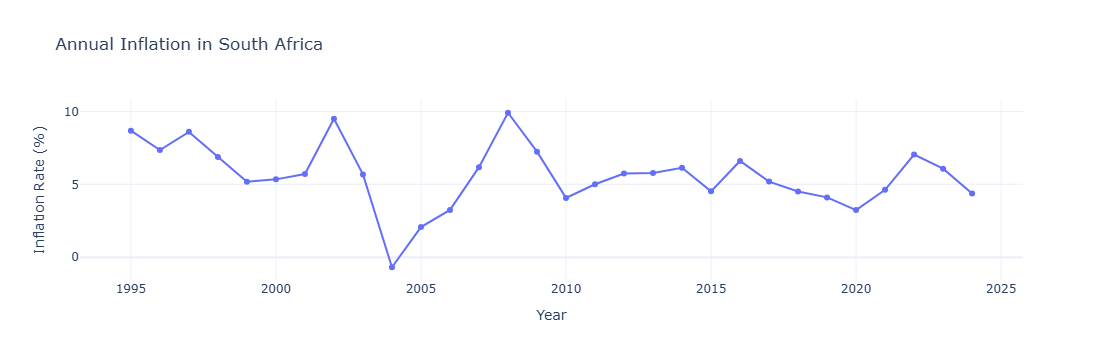

In [156]:
fig = px.line(
    df_final,
    x='Year',
    y='Inflation',
    title='Annual Inflation in South Africa',
    markers=True
)
fig.update_layout(
    yaxis_title="Inflation Rate (%)",
    xaxis_title="Year",
    template="plotly_white"   
)
fig.show()

Inflation refers to a sustained increase in the general price level, while deflation refers to a sustained decrease. 
South Africa experienced relatively high inflation during the 1990s, with rates ranging between approximately 7% and 9%. 
Inflation declined in the early 2000s, stabilising around 5% before reaching a localised peak of approximately 9.5%. 
Following tighter monetary policy implemented by the South African Reserve Bank in the early 2000s, inflation moderated between 2002 and 2004. 
Inflation rose again and peaked at approximately 9.9% in 2008, reflecting the impact of the global financial crisis. 
In the years following the crisis, inflation stabilised within a range of roughly 4%–5%.


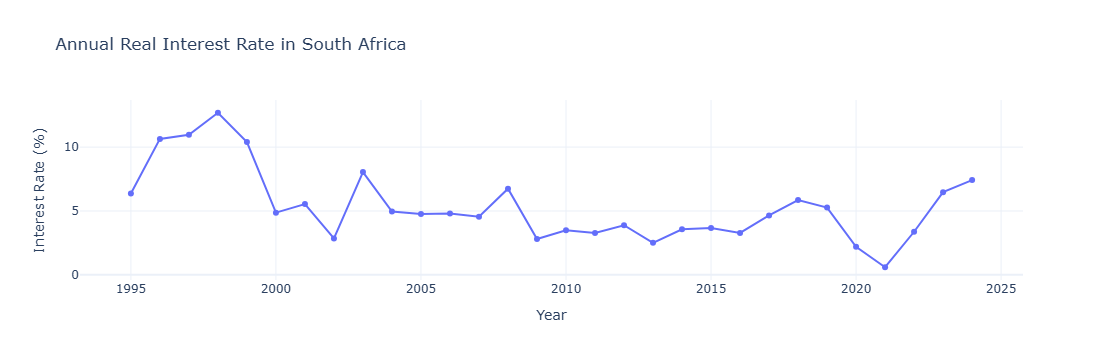

In [153]:
fig = px.line(
    df_final,
    x='Year',
    y='Interest Rate',
    title='Annual Real Interest Rate in South Africa',
    markers=True
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Interest Rate (%)',
    template='plotly_white'
)
fig.show()

Real interest rates reflect the cost of borrowing after adjusting for inflation and are an important tool of monetary policy. 
During the late 1990s and early 2000s, South Africa experienced relatively high and volatile real interest rates as the South African Reserve Bank aimed to control inflationary pressures. 
Real interest rates declined in 2001 and reached a local minimum of approximately 2.8%, followed by a sharp increase in 2002, peaking at around 8% in 2003. 
Around the 2008 global financial crisis, real interest rates fluctuated but generally ranged between 3% and 5% as monetary policy responded to economic uncertainty. 
From 2019 onwards, real interest rates declined significantly, reaching a minimum of approximately 0.6% in 2021, largely due to monetary policy implemented in response to the COVID-19 pandemic.

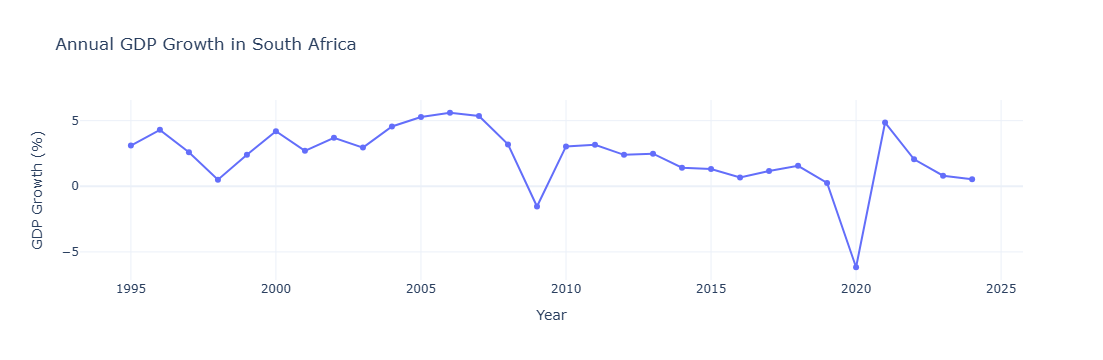

In [154]:
fig = px.line(
    df_final,
    x='Year',
    y='GDP Growth',
    title='Annual GDP Growth in South Africa',
    markers=True
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP Growth (%)',
    template='plotly_white'
)
fig.show()

GDP measures the total value of final goods and services produced within a country over a given period. 
South Africa experienced relatively strong GDP growth between 2003 and 2006, followed by a slowdown beginning in 2007. 
While growth remained positive in 2007, negative growth was observed during the latter part of 2008, reflecting the global financial crisis. 
The economy rebounded in 2009 and showed relatively steady growth until 2019. 
The sharp decline in GDP growth between 2019 and 2020 corresponds to the economic impact of the COVID-19 pandemic.

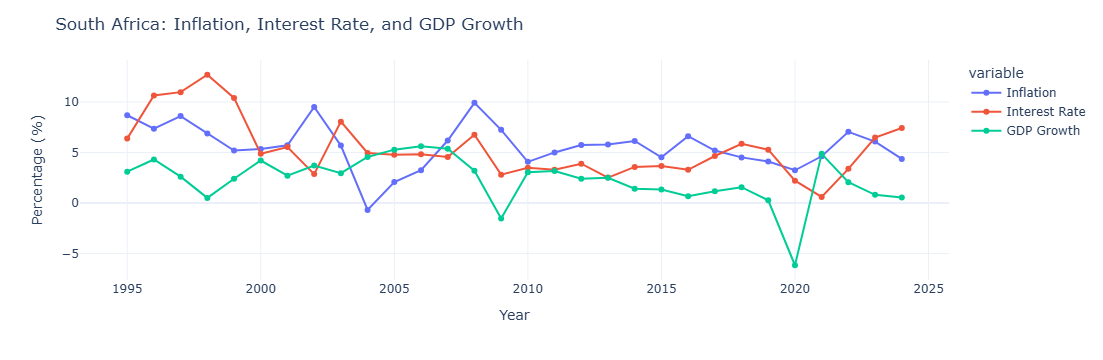

In [155]:
fig = px.line(
    df_final,
    x='Year',
    y=['Inflation','Interest Rate','GDP Growth'],
    markers=True
)

fig.update_layout(
    title='South Africa: Inflation, Interest Rate, and GDP Growth',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    template='plotly_white'
)

fig.show()

GDP growth, inflation, and real interest rates are closely interconnected through monetary policy and aggregate demand. 
Inflation and interest rates tend to move closely together, as rising inflation often prompts the South African Reserve Bank to increase interest rates in order to reduce borrowing and spending. 
This relationship is evident in the early 2000s, when inflation reached approximately 9.5% in 2002 and was followed by a sharp increase in real interest rates to around 8% in 2003. 
This tightening of monetary policy contributed to a subsequent decline in inflation, resulting in a brief period of deflation in 2004, when inflation fell to approximately –0.69%. 
Higher interest rates also affect GDP growth by increasing the cost of borrowing, which reduces investment and consumption, leading to slower economic growth.